In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import sklearn.decomposition
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc, accuracy_score, confusion_matrix, roc_curve, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow import keras
import os

In [2]:
MergedData0 = pd.read_csv('Data.csv', index_col=0);
MergedData1 = MergedData0.iloc[:, :-1]
y = pd.read_csv("cancer_kidney_training.txt", index_col='gene')
y.rename_axis("DepMap_ID")
y = y == 'positive'
data = MergedData1.merge(y, how='inner', left_index=True, right_index=True)
Data = data.iloc[:, :-1]
y = data.iloc[:, -1]
display(Data)
display(y)

,ACH-000001_x,ACH-000004_x,ACH-000005_x,ACH-000007_x,ACH-000009_x,ACH-000011_x,ACH-000012_x,ACH-000013_x,ACH-000014_x,ACH-000015_x,...,ACH-001578,ACH-000036,ACH-000973,ACH-001128,ACH-000750,ACH-000285,ACH-002669,ACH-001858,ACH-001997,ACH-000052
ACSL3,0.206118,0.564185,0.151348,0.126941,0.334351,0.056647,0.823666,0.068817,0.626790,0.960795,...,5.639232,5.617651,5.078097,5.674687,6.429783,4.640968,6.672284,6.075747,5.606442,6.079591
ACSL3,0.206118,0.564185,0.151348,0.126941,0.334351,0.056647,0.823666,0.068817,0.626790,0.960795,...,5.639232,5.617651,5.078097,5.674687,6.429783,4.640968,6.672284,6.075747,5.606442,6.079591
ADAD2,0.015341,0.057175,0.235037,0.044320,0.013512,0.035757,0.108234,0.120932,0.016063,0.006215,...,0.150560,0.000000,0.000000,0.000000,0.000000,0.310340,0.000000,0.000000,0.028569,0.014355
ADAMTS4,0.046855,0.256482,0.073674,0.154893,0.292487,0.110251,0.099467,0.137394,0.057690,0.041533,...,0.226509,0.028569,0.014355,0.070389,0.000000,0.028569,0.014355,0.000000,0.014355,2.462052
ADAMTS4,0.046855,0.256482,0.073674,0.154893,0.292487,0.110251,0.099467,0.137394,0.057690,0.041533,...,0.226509,0.028569,0.014355,0.070389,0.000000,0.028569,0.014355,0.000000,0.014355,2.462052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZBTB38,0.026336,0.054377,0.003372,0.023879,0.020726,0.020952,0.026529,0.025580,0.055892,0.010696,...,1.655352,3.804260,2.521051,4.301588,5.774524,2.592158,4.466627,4.904484,3.906891,3.428946
ZFP41,0.054813,0.038026,0.039214,0.231471,0.046033,0.090209,0.049339,0.052933,0.559185,0.004391,...,2.625270,2.857981,3.543496,3.121015,3.572890,3.882643,2.389567,2.304511,3.372952,3.951401
ZNF398,0.009591,0.007345,0.016498,0.076604,0.041353,0.012088,0.005942,0.004196,0.307829,0.027200,...,3.850999,2.657640,2.601697,2.548437,1.480265,3.995485,2.887525,2.137504,2.505891,3.129283
ZNF398,0.009591,0.007345,0.016498,0.076604,0.041353,0.012088,0.005942,0.004196,0.307829,0.027200,...,3.850999,2.657640,2.601697,2.548437,1.480265,3.995485,2.887525,2.137504,2.505891,3.129283


ACSL3      False
ACSL3      False
ADAD2      False
ADAMTS4    False
ADAMTS4    False
           ...  
ZBTB38     False
ZFP41      False
ZNF398     False
ZNF398     False
ZNF596     False
Name: label, Length: 380, dtype: bool

In [3]:
data_gene_dep = Data.iloc[:, 0:1086]
data_gene_dep;
data_gene_eff = Data.iloc[:, 1087:2172]
data_gene_eff;
data_express = Data.iloc[:, 2173:3578]
data_express;

In [4]:
pca = sklearn.decomposition.PCA(n_components=8, svd_solver='randomized')
X1 = pca.fit_transform(data_gene_dep)
print(pca.explained_variance_ratio_)

[0.81608122 0.01373532 0.0123943  0.01032878 0.00855543 0.00821923
 0.00657963 0.00613097]


In [5]:
pca = sklearn.decomposition.PCA(n_components=8, svd_solver='randomized')
X2 = pca.fit_transform(data_gene_eff)
print(pca.explained_variance_ratio_)

[0.85505006 0.01136764 0.00873795 0.00705049 0.00581364 0.00507887
 0.00502109 0.00447377]


In [6]:
pca = sklearn.decomposition.PCA(n_components=8, svd_solver='randomized')
X3 = pca.fit_transform(data_express)
print(pca.explained_variance_ratio_)

[0.7993859  0.02808854 0.02400717 0.01234759 0.00777898 0.00669571
 0.00616573 0.00526232]


In [7]:
X4 = np.concatenate((X1, X2, X3), axis=1)
print(X4.shape)

(380, 24)


(229, 24)
(229,)
112


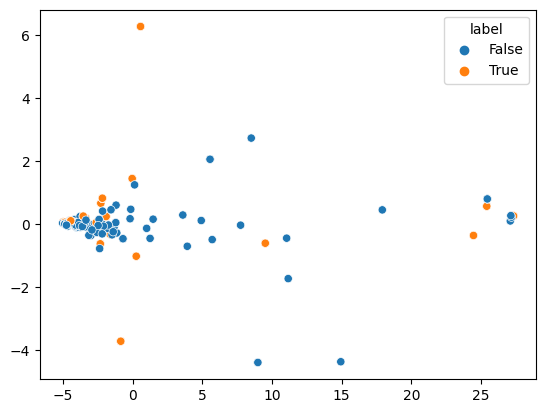

In [8]:
select = np.maximum(y, np.random.rand(len(y)) < sum(y)/(len(y) - sum(y)))
X4 = X4[select]
y = y[select]
print(X4.shape)
print(y.shape)
print(sum(y))
sns.scatterplot(x= X4[:,0], y=X4[:,1], hue=y)
plt.show()

In [9]:
# Get the training and test data
X_train, X_test, y_train, y_test = train_test_split(X4, y, test_size=0.3)

# Fit the model
model = LogisticRegression(max_iter=10000).fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_rt = model.predict_proba(X_test)[:, 1]

accuracy = str(accuracy_score(y_test, y_pred))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rt)
auc_value = str(auc(fpr, tpr))
precision = str(precision_score(y_test, y_pred))
recall = str(recall_score(y_test, y_pred))
f1score = str(f1_score(y_test, y_pred, average="weighted"))

Accuracy:0.782608695652174
Precision:0.7272727272727273
Recall:0.8


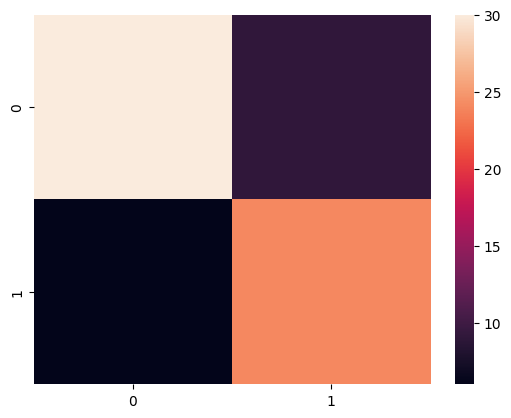

[[30  9]
 [ 6 24]]


In [10]:
print("Accuracy:" + accuracy)
print("Precision:" + precision)
print("Recall:" + recall)

conf_mx = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mx)
plt.show()

print(conf_mx)

In [11]:
keras.backend.clear_session()
np.random.seed(50)
tf.random.set_seed(50)

In [12]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

In [13]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[24]),
    keras.layers.Dense(150, activation="relu"),
    keras.layers.Dense(75, activation="relu"),
    keras.layers.Dense(8, activation="softmax")
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 24)                0         
                                                                 
 dense (Dense)               (None, 150)               3750      
                                                                 
 dense_1 (Dense)             (None, 75)                11325     
                                                                 
 dense_2 (Dense)             (None, 8)                 608       
                                                                 
Total params: 15,683
Trainable params: 15,683
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

In [16]:
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_test, y_test),
                    callbacks=[expon_lr])

Epoch 1/5
5/5 [==============================] - 1s 92ms/step - loss: 4.7233 - accuracy: 0.3000 - val_loss: 2.1334 - val_accuracy: 0.4058
Epoch 2/5
5/5 [==============================] - 0s 15ms/step - loss: 1.7288 - accuracy: 0.4812 - val_loss: 1.8204 - val_accuracy: 0.4348
Epoch 3/5
5/5 [==============================] - 0s 21ms/step - loss: 1.7268 - accuracy: 0.4375 - val_loss: 1.5393 - val_accuracy: 0.4493
Epoch 4/5
5/5 [==============================] - 0s 20ms/step - loss: 1.4847 - accuracy: 0.5125 - val_loss: 1.2767 - val_accuracy: 0.4493
Epoch 5/5
5/5 [==============================] - 0s 19ms/step - loss: 1.2346 - accuracy: 0.5375 - val_loss: 1.4380 - val_accuracy: 0.4928


Text(0, 0.5, 'Loss')

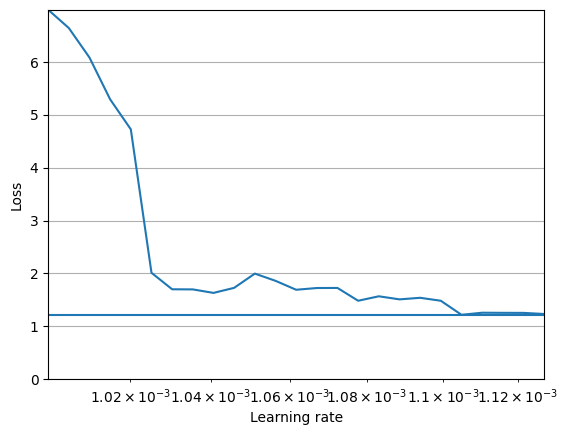

In [17]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

In [18]:
print("Min Loss: " + str(min(expon_lr.losses)))
print("Best learning rate: " + str(expon_lr.rates[np.argmin(expon_lr.losses)]))
alpha = expon_lr.rates[np.argmin(expon_lr.losses)];

Min Loss: 1.2195990085601807
Best learning rate: 0.0011048956


In [19]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers, callbacks
keras.backend.clear_session()
np.random.seed(50)
tf.random.set_seed(50)

In [20]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[24]),
    keras.layers.Dense(150, activation="relu"),
    keras.layers.Dense(75, activation="relu"),
    keras.layers.Dense(8, activation="softmax")
])

In [21]:
#Using optimized learning rate: 
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=alpha),
              metrics=["accuracy"])

In [22]:
run_index = 1 # increment this at every run
run_logdir = os.path.join(os.curdir, "kidneytypes_logs", "run_{:03d}".format(run_index))
run_logdir

'.\\kidneytypes_logs\\run_001'

In [23]:
early_stopping_cb = keras.callbacks.EarlyStopping(
    min_delta=0.0005, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
)
checkpoint_cb = keras.callbacks.ModelCheckpoint("kidneytypes_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=200,
                    validation_data=(X_test, y_test),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/200
5/5 [==============================] - 2s 137ms/step - loss: 3.0012 - accuracy: 0.3812 - val_loss: 2.2493 - val_accuracy: 0.4348
Epoch 2/200
5/5 [==============================] - 0s 79ms/step - loss: 1.5606 - accuracy: 0.5125 - val_loss: 1.9484 - val_accuracy: 0.4493
Epoch 3/200
5/5 [==============================] - 0s 58ms/step - loss: 1.6793 - accuracy: 0.4938 - val_loss: 1.7448 - val_accuracy: 0.4928
Epoch 4/200
5/5 [==============================] - 0s 62ms/step - loss: 1.5211 - accuracy: 0.5375 - val_loss: 1.7654 - val_accuracy: 0.4928
Epoch 5/200
5/5 [==============================] - 0s 92ms/step - loss: 1.3325 - accuracy: 0.5562 - val_loss: 1.7856 - val_accuracy: 0.4928
Epoch 6/200
5/5 [==============================] - 0s 76ms/step - loss: 1.7103 - accuracy: 0.4875 - val_loss: 1.5108 - val_accuracy: 0.4928
Epoch 7/200
5/5 [==============================] - 0s 122ms/step - loss: 1.0432 - accuracy: 0.6125 - val_loss: 1.3711 - val_accuracy: 0.4928
Epoch 8/200
5/5 [=

In [24]:
model = keras.models.load_model("kidneytypes_model.h5") # rollback to best model
model.evaluate(X_test, y_test)
model.evaluate(X_train, y_train)

5/5 [==============================] - 0s 3ms/step - loss: 0.2341 - accuracy: 0.9187


[0.23409625887870789, 0.918749988079071]

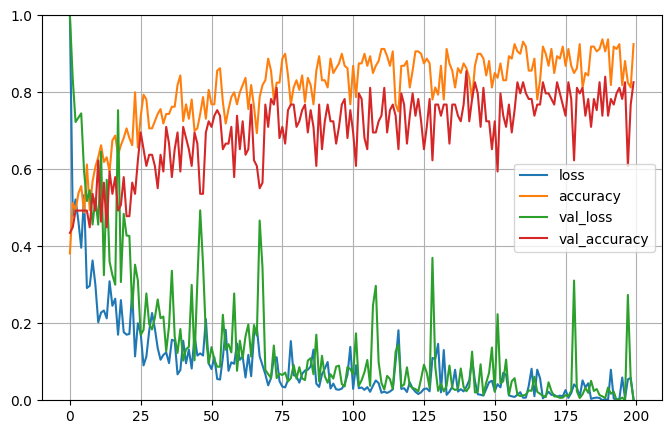

In [25]:
#Plot of Loss, Val_Loss, Accuracy and Val_Accuracy, with loss and val_loss normalized by max and min
hist = pd.DataFrame(history.history)#.plot(figsize=(8, 5))
hist['loss'] = (hist['loss'] - hist['loss'].min()) / (hist['loss'].max() - hist['loss'].min())
hist['val_loss'] = (hist['val_loss'] - hist['val_loss'].min()) / (hist['val_loss'].max() - hist['val_loss'].min())
hist.plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
 
plt.show()